## 学習に関するテクニック
* パラメータの更新(損失関数の値をできるだけ小さくする)

### SGD
* lrが学習係数
* Updateで繰り返し呼ばれる
* 引数のparamsとgradsはディクショナリ変数

### SGDの欠点
* 次のような関数が与えられて最小値を求める場合
$$f(x, y)=\frac{1}{20}x^2+y^2$$

* 関数の形状が等方的でないとスマートな学習にはならない

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in parans.keys():
            params[key] -= self.lr * grads[key]

### Momentum

$$v\leftarrow\alpha{v}-\eta{\frac{\delta{L}}{\delta{W}}}　$$
$$W\leftarrow W+v$$

* Wは重みパラメータ右側はWに関する損失関数の勾配ηは学習係数
* vとは物理では速度は表す。αvは物体が何も力を受けない時に徐々に減速していくための役割がある。

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.item():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += v[key]

### AdaGrad

$$h \leftarrow h+\frac{\delta{L}}{\delta{W}} \cdot \frac{\delta{L}}{\delta{W}}$$
$$W \leftarrow W - \eta{\frac{1}{\sqrt{h}}}\frac{\delta{L}}{\delta{W}}$$

* hとはこれまで経験した勾配の値を二乗和として保持する。
* これをさらに改善した手法としてRMSPropがある。（過去の勾配を均一に加算するのではなく忘れていくという手法（新しい勾配が大きく反映する））

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key]  / (np.sqrt(self.h[key] + 1e-7))#1e-7はゼロで乗算するのを防ぐため

### Adam
* MomentumとAdaGradの融合
##### Required:
* α（学習係数）
* β１・β２（指数関数的減衰）
* m0(一つ目のモーメントベクター)
* v0(指数関数的に重み付けされた無限大ノルム)

$$m_t \leftarrow \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$
$$v_t \leftarrow \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^{2}$$

$$\alpha_t = \alpha \cdot \sqrt{1 - \beta_2^{t}} / (1 - \beta_1{t})$$

In [6]:
class Adam:
    
    '''https://arxiv.org/abs/1412.6980'''
    
    def __inti__(lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = None
        self.v = None
        self.iter = 0
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeors_like(val)
        
        for key in params.keys():
            lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
            self.m[key] += self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] += self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key]**2)
            
            params[key] -= self.lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

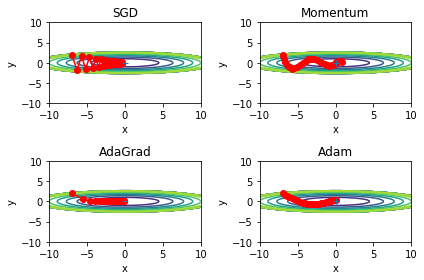

In [9]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
os.chdir("/work/dl_learning/deep-learning-from-scratch-master/common")
from optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
plt.tight_layout()    
plt.show()